In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_phishing = pd.read_csv('phishing.csv')
df_shuffled = df_phishing.sample(frac=1).reset_index(drop=True)

#df de phishing
df_new_phishing = df_shuffled.head(578)

#df de teste
df_test_phishing = df_shuffled.tail(1000)

df_notphishing = pd.read_csv('not-phishing.csv')
df_notphishing.head()


,_id,assets_downloaded,domain,features.css,features.html,features.text,folder_path,language,protocol,remote_ip_address,...,security_valid_from,security_valid_to,url,whois_domain_age,whois_raw_text,whois_registrar,whois_registrar_url,whois_registry_created_at,whois_registry_expired_at,whois_registry_updated_at
0,642ea80461bb656e3eb3ee0d,0.890756,edition.cnn.com,"{""color"": [""#555555"", ""#68B631"", ""#262626"", ""#...","[""html"", ""head"", ""meta"", ""meta"", ""meta"", ""meta...","\n CNN International - Breaking News, US News,...",phishing/642ea80461bb656e3eb3ee0d,en,h2,2a04:4e42:200::773,...,2022-12-09T19:19:20.000Z,2024-01-10T19:19:19.000Z,https://edition.cnn.com/,10778.0,Domain Name: CNN.COM\r\n Registry Domain ...,NaN,http://cscdbs.com,1993-09-22T00:00:00.000Z,2026-09-21T00:00:00.000Z,2020-10-20T13:09:44.000Z
1,642ea9b761bb656e3eb3ee0f,0.956989,booking.miramonti.aurturist.com,"{""-webkit-box-sizing"": [""border-box""], ""box-si...","[""html"", ""head"", ""style"", ""style"", ""style"", ""s...",\n Aurturist Miramonti S. Candido\n \n Ihr Jav...,phishing/642ea9b761bb656e3eb3ee0f,de,h2,135.125.240.140,...,2023-03-27T09:01:02.000Z,2023-06-25T09:01:01.000Z,https://booking.miramonti.aurturist.com/,2594.0,Domain Name: AURTURIST.COM\r\n Registry D...,NaN,http://www.ionos.com,2016-02-18T09:34:35.000Z,2024-02-18T09:34:35.000Z,2020-02-10T07:14:18.000Z
2,642eaa1961bb656e3eb3ee11,0.916667,www.cours2soutien.fr,"{""background"": [""#EFF1F2"", ""transparent""], ""bo...","[""html"", ""head"", ""meta"", ""meta"", ""meta"", ""meta...",\n Besoin de cours de soutien scolaire à Saint...,phishing/642eaa1961bb656e3eb3ee11,fr,h2,34.117.168.233,...,2023-03-27T09:01:13.000Z,2023-06-25T09:01:12.000Z,https://www.cours2soutien.fr/,390.0,%%\n%% This is the AFNIC Whois server.\n%%\n%%...,NaN,NaN,2022-03-02T08:36:55.000Z,2024-03-02T08:36:55.000Z,2023-01-27T09:52:07.813Z
3,642eaa7c61bb656e3eb3ee14,0.924242,canva-note.com,"{""box-sizing"": [""border-box"", ""content-box""], ...","[""html"", ""head"", ""meta"", ""meta"", ""meta"", ""meta...",\n トップページ\n \n TOP\n \n Canva使い方\n \n オンラインレッス...,phishing/642eaa7c61bb656e3eb3ee14,ja,h2,160.251.71.153,...,2023-02-25T06:52:04.000Z,2023-05-26T06:52:03.000Z,https://canva-note.com/,168.0,Domain Name: CANVA-NOTE.COM\r\n Registry ...,NaN,http://gmo.jp,2022-10-10T02:26:20.000Z,2023-10-10T02:26:20.000Z,2022-10-10T11:26:22.000Z
4,642eaa9a61bb656e3eb3ee16,0.750000,ww1.learningplusonsemi.com,"{""font-family"": [""Arial"", ""sans-serif""], ""heig...","[""html"", ""head"", ""meta"", ""meta"", ""link"", ""titl...",\n Learningplusonsemi.com\n \n Learningplusons...,phishing/642eaa9a61bb656e3eb3ee16,en,http/1.1,63.141.242.46,...,NaN,NaN,http://ww1.learningplusonsemi.com/,5.0,Domain Name: LEARNINGPLUSONSEMI.COM\r\n R...,NaN,http://www.godaddy.com,2023-03-21T15:28:27.000Z,2024-03-21T15:28:27.000Z,2023-03-21T15:28:27.000Z


In [ ]:
df_notphishing['is_phishing'] = 0
df_new_phishing['is_phishing'] = 1
df_new_phishing.head()

#df de teste
df_test_phishing['is_phishing'] = 1

<ipython-input-2-a202f416d86c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_phishing['is_phishing'] = 1
<ipython-input-2-a202f416d86c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_phishing['is_phishing'] = 1


In [ ]:
df = pd.concat([df_new_phishing, df_notphishing])

df = df.reset_index(drop=True)
df['_id'] = df.index
df

df_test = pd.concat([df_test_phishing, df_notphishing])

df_test = df_test.reset_index(drop=True)
df_test['_id'] = df_test.index

In [ ]:
df_test['is_phishing'] = df_test['is_phishing'].fillna(1)

In [ ]:
df['brands'] = df['brands'].fillna('["null"]')
df['brands'] = df['brands'].apply(lambda x: x.replace('[', ''))
df['brands'] = df['brands'].apply(lambda x: x.replace(']', ''))
df

df_test['brands'] = df_test['brands'].fillna('["null"]')
df_test['brands'] = df_test['brands'].apply(lambda x: x.replace('[', ''))
df_test['brands'] = df_test['brands'].apply(lambda x: x.replace(']', ''))

In [ ]:
# Reordena o dataframe aleatoriamente
df = df.sample(frac=1).reset_index(drop=True)

# Altera os valores de '_id' para seguir a ordem crescente
df['_id'] = df.index
df

df_test = df_test.sample(frac=1).reset_index(drop=True)

# Altera os valores de '_id' para seguir a ordem crescente
df_test['_id'] = df_test.index

In [ ]:
for col in df.columns:
    if pd.api.types.is_string_dtype(df[col]):
        df[col] = df[col].fillna('null')
    elif pd.api.types.is_numeric_dtype(df[col]):
        df[col] = df[col].fillna(0)

for col in df_test.columns:
    if pd.api.types.is_string_dtype(df_test[col]):
        df_test[col] = df_test[col].fillna('null')
    elif pd.api.types.is_numeric_dtype(df_test[col]):
        df_test[col] = df_test[col].fillna(0)

In [ ]:
# retirando colunas irelevantes para a análise
df = df.drop(columns=['whois_raw_text'])
df = df.drop(columns=['folder_path'])
df = df.drop(columns=['features.css'])
df = df.drop(columns=['features.text'])
df = df.drop(columns=['whois_registry_created_at'])
df = df.drop(columns=['whois_registry_expired_at'])
df = df.drop(columns=['whois_registry_updated_at'])
df = df.drop(columns=['remote_ip_asn'])
df = df.drop(columns=['security_valid_from'])
df = df.drop(columns=['security_valid_to'])
df = df.drop(columns=['scan_date'])
df = df.drop(columns=['remote_ip_isp_org'])
df = df.drop(columns=['whois_registrar'])
df.head()


df_test = df_test.drop(columns=['whois_raw_text'])
df_test = df_test.drop(columns=['folder_path'])
df_test = df_test.drop(columns=['features.css'])
df_test = df_test.drop(columns=['features.text'])
df_test = df_test.drop(columns=['whois_registry_created_at'])
df_test = df_test.drop(columns=['whois_registry_expired_at'])
df_test = df_test.drop(columns=['whois_registry_updated_at'])
df_test = df_test.drop(columns=['remote_ip_asn'])
df_test = df_test.drop(columns=['security_valid_from'])
df_test = df_test.drop(columns=['security_valid_to'])
df_test = df_test.drop(columns=['scan_date'])
df_test = df_test.drop(columns=['remote_ip_isp_org'])
df_test = df_test.drop(columns=['whois_registrar'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['brands'] = le.fit_transform(df['brands'])
df['domain'] = le.fit_transform(df['domain'])
df['features.html'] = le.fit_transform(df['features.html'])
df['language'] = le.fit_transform(df['language'])
df['protocol'] = le.fit_transform(df['protocol'])
df['remote_ip_address'] = le.fit_transform(df['remote_ip_address'])
df['remote_ip_country'] = le.fit_transform(df['remote_ip_country'])
df['remote_ip_domain'] = le.fit_transform(df['remote_ip_domain'])
df['remote_ip_isp'] = le.fit_transform(df['remote_ip_isp'])
df['security_issuer'] = le.fit_transform(df['security_issuer'])
df['security_protocol'] = le.fit_transform(df['security_protocol'])
df['security_state'] = le.fit_transform(df['security_state'])
df['url'] = le.fit_transform(df['url'])
df['whois_registrar_url'] = le.fit_transform(df['whois_registrar_url'])

df.head()

df_test['brands'] = le.fit_transform(df_test['brands'])
df_test['domain'] = le.fit_transform(df_test['domain'])
df_test['features.html'] = le.fit_transform(df_test['features.html'])
df_test['language'] = le.fit_transform(df_test['language'])
df_test['protocol'] = le.fit_transform(df_test['protocol'])
df_test['remote_ip_address'] = le.fit_transform(df_test['remote_ip_address'])
df_test['remote_ip_country'] = le.fit_transform(df_test['remote_ip_country'])
df_test['remote_ip_domain'] = le.fit_transform(df_test['remote_ip_domain'])
df_test['remote_ip_isp'] = le.fit_transform(df_test['remote_ip_isp'])
df_test['security_issuer'] = le.fit_transform(df_test['security_issuer'])
df_test['security_protocol'] = le.fit_transform(df_test['security_protocol'])
df_test['security_state'] = le.fit_transform(df_test['security_state'])
df_test['url'] = le.fit_transform(df_test['url'])
df_test['whois_registrar_url'] = le.fit_transform(df_test['whois_registrar_url'])


In [ ]:
X = df.drop(columns=['is_phishing'])
y = df['is_phishing']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=139)

In [ ]:
from sklearn.feature_selection import mutual_info_classif

mutual_info = mutual_info_classif(X_train, y_train)

feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Mutual Information': mutual_info})

feature_importance_df = feature_importance_df.sort_values('Mutual Information', ascending=False)

print(feature_importance_df)

                Feature  Mutual Information
2                brands            0.321391
4         features.html            0.115894
15     whois_domain_age            0.087915
7     remote_ip_address            0.085870
1     assets_downloaded            0.064851
10        remote_ip_isp            0.061028
16  whois_registrar_url            0.060203
3                domain            0.057494
14                  url            0.053148
9      remote_ip_domain            0.048562
11      security_issuer            0.034242
8     remote_ip_country            0.012547
5              language            0.008979
13       security_state            0.008380
0                   _id            0.003989
6              protocol            0.000857
12    security_protocol            0.000000


In [ ]:
#Dropamos os valores menores que 0.05 de ganho de informacao
X = df.drop(columns=['is_phishing', '_id', 'protocol', 'security_state', 'security_protocol', 'remote_ip_country', 'language', 'security_issuer', 'remote_ip_domain', 'remote_ip_isp'])
y = df['is_phishing']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=139)

mutual_info = mutual_info_classif(X_train, y_train)

feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Mutual Information': mutual_info})

feature_importance_df = feature_importance_df.sort_values('Mutual Information', ascending=False)

feature_importance_df

,Feature,Mutual Information
1,brands,0.321176
3,features.html,0.116287
6,whois_domain_age,0.091495
4,remote_ip_address,0.084802
0,assets_downloaded,0.068318
7,whois_registrar_url,0.057159
2,domain,0.056497
5,url,0.052801


In [ ]:
#Dropamos os valores menores que 0.05 de ganho de informacao

df_test.drop(columns=['_id'], inplace=True)
df_test.drop(columns=['protocol'], inplace=True)
df_test.drop(columns=['security_state'], inplace=True)
df_test.drop(columns=['security_protocol'], inplace=True)
df_test.drop(columns=['remote_ip_country'], inplace=True)
df_test.drop(columns=['language'], inplace=True)
df_test.drop(columns=['security_issuer'], inplace=True)
df_test.drop(columns=['remote_ip_domain'], inplace=True)
df_test.drop(columns=['remote_ip_isp'], inplace=True)


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

models = {
    'Logistic Regression': (LogisticRegression(), {'C': [0.1, 1, 10], 'solver': ['liblinear', 'saga']}),
    'KNN': (KNeighborsClassifier(), {'n_neighbors': [1,2,3,4,5,6,7,8,9,10], 'weights': ['uniform', 'distance'], 'metric': ['euclidean','manhattan']}),
    'Decision Tree': (DecisionTreeClassifier(), {'max_depth': [5,10,15,20], 'min_samples_split': [2, 5, 10], 'criterion':['gini','entropy'], 'min_samples_leaf': [1, 2, 4]}),
    'Random Forest': (RandomForestClassifier(), {'n_estimators': [50, 100, 200], 'max_depth': [5,10,15,20], 'criterion':['gini','entropy'], 'min_samples_leaf': [1, 2, 4]})
}

for name, (model, params) in models.items():
    grid_search = GridSearchCV(model, params, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    print(f"Resultados para {name}:")
    print(f"Melhores parâmetros: {grid_search.best_params_}")
    print(f"Melhor pontuação: {grid_search.best_score_}")
    print(f"Pontuação no conjunto de teste: {grid_search.score(X_test, y_test)}")
    print(classification_report(y_test, grid_search.predict(X_test)))
    print("\n")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which 

Resultados para Logistic Regression:
Melhores parâmetros: {'C': 0.1, 'solver': 'liblinear'}
Melhor pontuação: 0.9160409454045906
Pontuação no conjunto de teste: 0.9107296137339056
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1046
           1       1.00      0.13      0.22       119

    accuracy                           0.91      1165
   macro avg       0.95      0.56      0.59      1165
weighted avg       0.92      0.91      0.88      1165





/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Resultados para KNN:
Melhores parâmetros: {'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}
Melhor pontuação: 0.9134635331430967
Pontuação no conjunto de teste: 0.9055793991416309
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1046
           1       0.61      0.21      0.31       119

    accuracy                           0.91      1165
   macro avg       0.76      0.60      0.63      1165
weighted avg       0.89      0.91      0.88      1165



Resultados para Decision Tree:
Melhores parâmetros: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Melhor pontuação: 0.9997851772287862
Pontuação no conjunto de teste: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1046
           1       1.00      1.00      1.00       119

    accuracy                           1.00      1165
   macro avg       1.00      1.00      1.00    

In [ ]:
# Linear Regression
lr = LogisticRegression(C=1, solver='liblinear', random_state=139)
lr.fit(X_train, y_train)
print(lr.score(X_test, y_test))
print("\n")

# KNN
knn = KNeighborsClassifier(n_neighbors = 6, weights = "uniform", metric = "manhattan")
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))
print("\n")

# Decision Tree
dt = DecisionTreeClassifier(max_depth=5, min_samples_split=2, criterion='gini', min_samples_leaf=1, random_state=139)
dt.fit(X_train, y_train)
print(dt.score(X_test, y_test))
print("\n")


# Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=10, criterion='gini', min_samples_leaf=1, random_state=139)
rf.fit(X_train, y_train)
print(rf.score(X_test, y_test))
print("\n")

0.9107296137339056


0.9004291845493563


1.0


0.9974248927038627




In [ ]:
import pickle

with open('Logistic_Regression.pkl', 'wb') as file:
    pickle.dump(lr, file)

with open('KNN.pkl', 'wb') as file:
    pickle.dump(knn, file)

with open('Random_Forest.pkl', 'wb') as file:
    pickle.dump(rf, file)


In [ ]:
#teste
df_test_x = df_test.drop(columns=['is_phishing'])
df_test_y = df_test['is_phishing']

print(f"Teste de score para Regressão Logística: {lr.score(df_test_x, df_test_y)}")
print(f"Teste de score para Knn: {knn.score(df_test_x, df_test_y)}")
print(f"Teste de score para Árvore de Decisão: {dt.score(df_test_x, df_test_y)}")
print(f"Teste de score para Floresta Aleatória: {rf.score(df_test_x, df_test_y)}")

Teste de score para Regressão Logística: 0.8601857783472133
Teste de score para Knn: 0.8632286995515696
Teste de score para Árvore de Decisão: 0.1593529788597053
Teste de score para Floresta Aleatória: 0.7214926329276105


0.9004291845493563




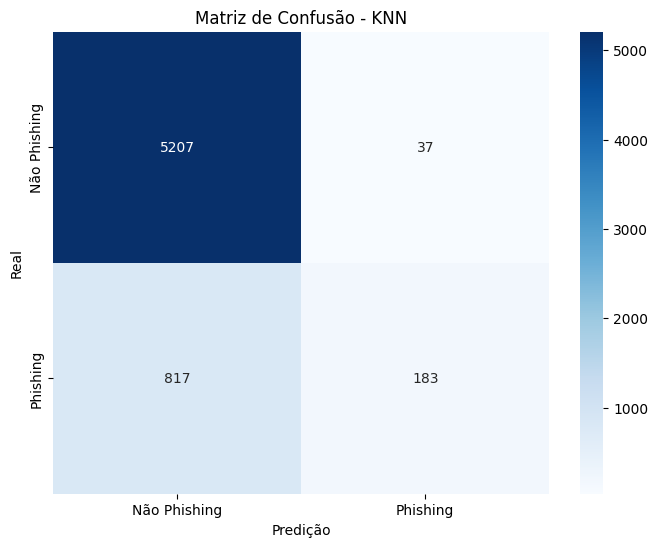

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# KNN
knn = KNeighborsClassifier(n_neighbors = 6, weights = "uniform", metric = "manhattan")
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))
print("\n")

# Matriz de Confusão
y_pred = knn.predict(df_test_x)
cm = confusion_matrix(df_test_y, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Não Phishing', 'Phishing'],
            yticklabels=['Não Phishing', 'Phishing'])
plt.xlabel('Predição')
plt.ylabel('Real')
plt.title('Matriz de Confusão - KNN')
plt.show()

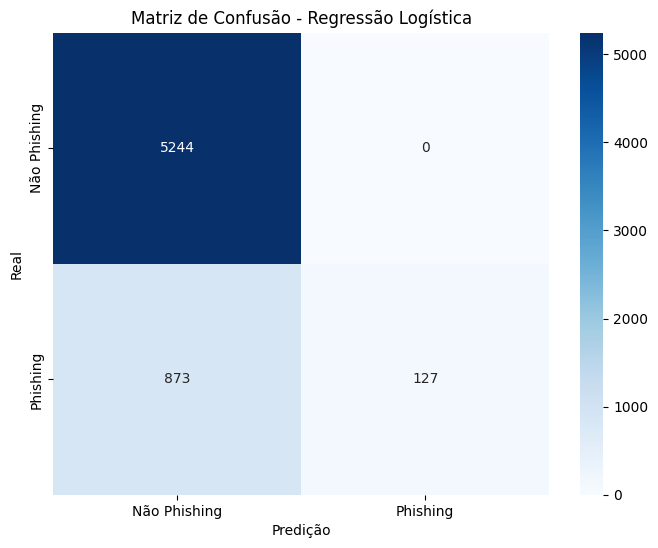

In [ ]:
# Matriz de Confusão para Regressão Logística
y_pred = lr.predict(df_test_x)
cm = confusion_matrix(df_test_y, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Não Phishing', 'Phishing'],
            yticklabels=['Não Phishing', 'Phishing'])
plt.xlabel('Predição')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Regressão Logística')
plt.show()

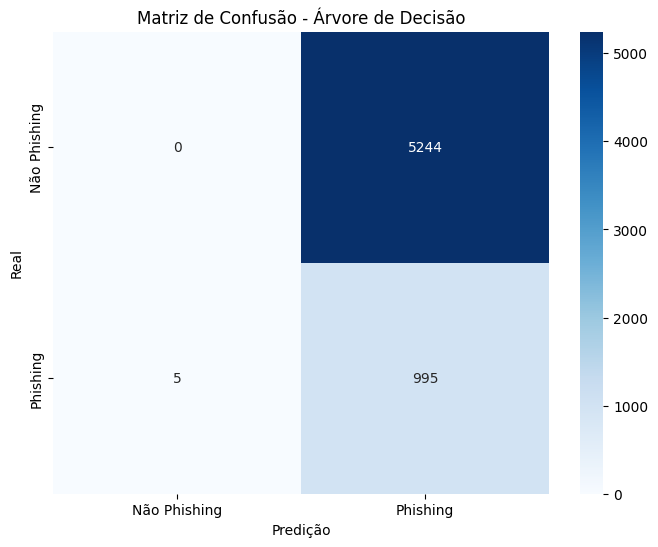

In [ ]:
y_pred = dt.predict(df_test_x)
cm = confusion_matrix(df_test_y, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Não Phishing', 'Phishing'],
            yticklabels=['Não Phishing', 'Phishing'])
plt.xlabel('Predição')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Árvore de Decisão')
plt.show()

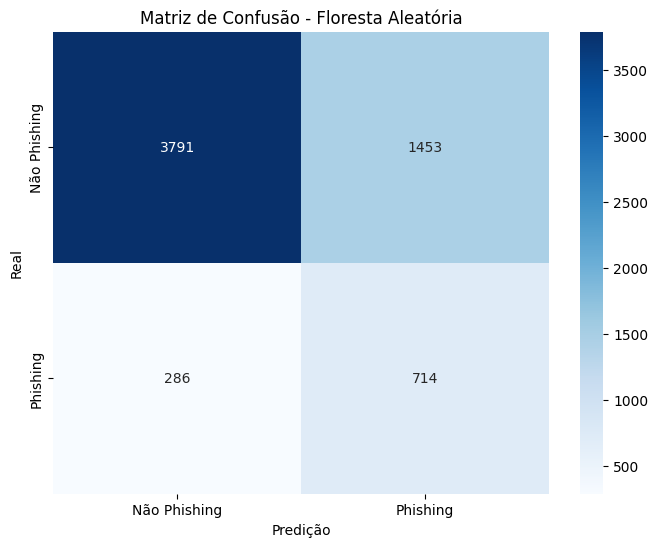

In [ ]:
y_pred = rf.predict(df_test_x)
cm = confusion_matrix(df_test_y, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Não Phishing', 'Phishing'],
            yticklabels=['Não Phishing', 'Phishing'])
plt.xlabel('Predição')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Floresta Aleatória')
plt.show()